In [ ]:
.! pip uninstall transformers -y -q
! pip install transformers[torch] -q
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 39.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv('/content/Restaurant reviews.csv')

In [ ]:
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,NaN
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,NaN
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,NaN
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,NaN


In [ ]:
df = df[["Review" , "Rating"]]

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5


In [ ]:
df.describe()

,Review,Rating
count,9955,9955
unique,9364,10
top,good,5
freq,237,3826


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9955 non-null   object
 1   Rating  9955 non-null   object
dtypes: object(2)
memory usage: 233.3+ KB
None


<Axes: xlabel='Rating', ylabel='count'>

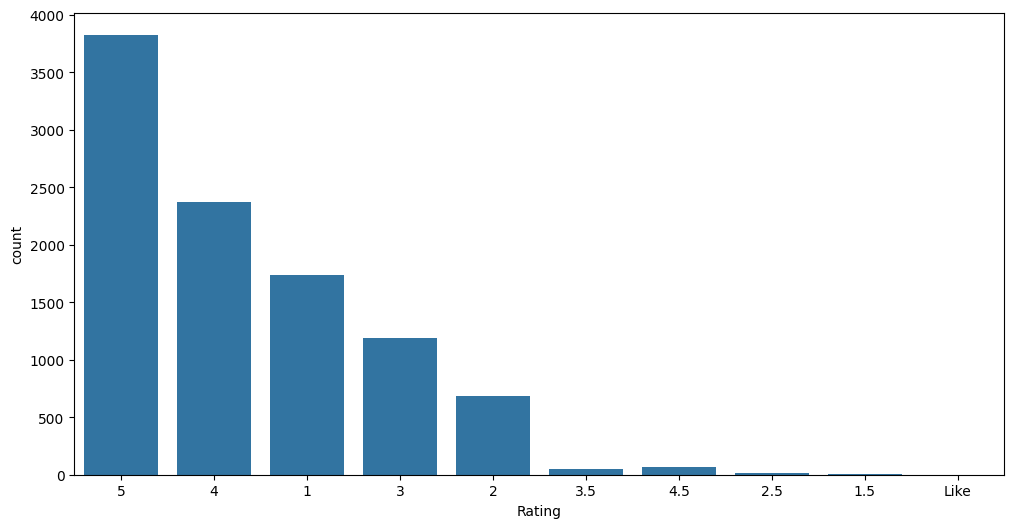

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating',data=df)

In [ ]:
df = df[df['Rating'].isin(['1', '5'])]

In [ ]:
df['Rating'].value_counts()

Rating
5    3826
1    1735
Name: count, dtype: int64

In [ ]:
def sample_by_senimwnt(df, sample_size=1200):
  sampled_df = pd.DataFrame()
  for value in df['Rating'].unique():
    subset = df[df['Rating'] == value]
    if len(subset) >= sample_size:
      sampled_df = pd.concat([sampled_df, subset.sample(sample_size)], ignore_index=True)
    else:
      sampled_df = pd.concat([sampled_df, subset], ignore_index=True)  # Include all rows if less than sample size

  return sampled_df

In [ ]:
df = sample_by_senimwnt(df,1700)

In [ ]:
df.shape

(3400, 2)

In [ ]:
df['Review'][0], df['Rating'][0]

('Went for the dinner with the family. All the items were delicious. You must try the firni in deserts.\nDont miss the platter and mouth watering non veg platters.',
 '5')

In [ ]:
df['sentiment'] = df['Rating'].replace({'5': 1, '1': 0})
df = df.drop('Rating',axis=1)
df.head()

,Review,sentiment
0,Went for the dinner with the family. All the i...,1
1,We had Mr.Bahadur serving us. He was very cour...,1
2,very nice,1
3,Such an amazing place definitely a 5 rated 🤩🤩\...,1
4,Breakfast was great.\nLot of options for healt...,1


In [ ]:
df.head()

,Review,sentiment
0,Went for the dinner with the family. All the i...,1
1,We had Mr.Bahadur serving us. He was very cour...,1
2,very nice,1
3,Such an amazing place definitely a 5 rated 🤩🤩\...,1
4,Breakfast was great.\nLot of options for healt...,1


In [ ]:
## hw : perform text cleaning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Review'],df['sentiment'],test_size=0.2)

len(X_train), len(X_test)

(2720, 680)

In [ ]:
X_train, X_test, y_train, y_test = list(X_train), list(X_test), list(y_train), list(y_test)
X_train[:2], y_train[:2]

(['very polite service done by shabir, starters Korean tossed chicken, oriental Devilled prawns were excellent. Veg flexhazo style crispy corn is good too',
  'Good job'],
 [1, 1])

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments

# Setting device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
class data(Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, index):
    item = {key: torch.tensor(val[index]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[index])
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name,model_max_length=512)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_encoding = tokenizer(X_train, truncation=True, padding=True)
test_encoding = tokenizer(X_test, truncation=True, padding=True)

train_dataset = data(train_encoding, y_train)
test_dataset = data(test_encoding, y_test)

In [ ]:
## hw: find out what is warmup steps, weight decay in training arguments in trainer from hugging face

In [ ]:
training_args = TrainingArguments(
  output_dir='./results',            # Directory where model checkpoints & results will be saved
  num_train_epochs=2,                # No of training epochs
  per_device_train_batch_size=32,    # Batch size for training per device
  per_device_eval_batch_size=32,     # Batch size for evaluation per device
  learning_rate=2e-05,               # Learning rate for optimizer
  warmup_steps=500,                  # No of warmup steps for the learning rate scheduler
  weight_decay=0.01,                 # Weight decay coefficient for regularization
  logging_dir='./logs',              # Directory for logging training information
  load_best_model_at_end=True,       # Whether to load the best model from checkpoints at the end of training
  logging_steps=200,                 # Log training metrics every `logging_steps` steps
  save_steps=400,                    # Save model checkpoints every `save_steps` steps
  evaluation_strategy="steps",       # Evaluate on the evaluation dataset every `logging_steps` steps
)

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(model_name)
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=train_dataset,
                  eval_dataset=test_dataset)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from accelerate import Accelerator

# Initialize Accelerator and Trainer
Accelerator()
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=170, training_loss=0.5224051980411305, metrics={'train_runtime': 239.953, 'train_samples_per_second': 22.671, 'train_steps_per_second': 0.708, 'total_flos': 720622648688640.0, 'train_loss': 0.5224051980411305, 'epoch': 2.0})

In [ ]:
def predict_sentiment(model, tokenizer, text, device):
    if torch.cuda.is_available() and device == 'cuda':
        model.to('cuda')
    tokenized = tokenizer(text, truncation=True, padding=True, return_tensors='pt').to(device)
    outputs = model(**tokenized)
    probs = F.softmax(outputs.logits, dim=-1)
    preds = torch.argmax(outputs.logits, dim=-1).item()
    probs_max = probs.max().detach().cpu().numpy()
    prediction = "Positive" if preds == 1 else "Negative"
    print(f'{text}\nSentiment: {prediction}\tProbability: {probs_max*100:.2f}%\n', end="-"*50 + "\n")

In [ ]:
text = 'Impeccable service, luxurious amenities, and breathtaking views. The epitome of comfort and relaxation. A truly unforgettable stay'
predict_sentiment(model, tokenizer, text, device)

Impeccable service, luxurious amenities, and breathtaking views. The epitome of comfort and relaxation. A truly unforgettable stay
Sentiment: Positive	Probability: 94.44%
--------------------------------------------------


In [ ]:
text = 'Disappointed by cleanliness standards, noisy surroundings, and subpar amenities. Not worth the price for the experience provided.'
predict_sentiment(model, tokenizer, text, device)

Disappointed by cleanliness standards, noisy surroundings, and subpar amenities. Not worth the price for the experience provided.
Sentiment: Negative	Probability: 92.65%
--------------------------------------------------


In [ ]:
bert_model_dir = "bert_finetuned"

In [ ]:
trainer.save_model(bert_model_dir)
tokenizer.save_pretrained(bert_model_dir)

('bert_finetuned/tokenizer_config.json',
 'bert_finetuned/special_tokens_map.json',
 'bert_finetuned/vocab.txt',
 'bert_finetuned/added_tokens.json',
 'bert_finetuned/tokenizer.json')

In [ ]:
! zip -r bert_finetuned.zip bert_finetuned

updating: bert_finetuned/ (stored 0%)
  adding: bert_finetuned/vocab.txt (deflated 53%)
  adding: bert_finetuned/config.json (deflated 46%)
  adding: bert_finetuned/model.safetensors (deflated 8%)
  adding: bert_finetuned/training_args.bin (deflated 51%)
  adding: bert_finetuned/tokenizer_config.json (deflated 76%)
  adding: bert_finetuned/special_tokens_map.json (deflated 42%)
  adding: bert_finetuned/tokenizer.json (deflated 71%)


In [ ]:
tokenizer2 = DistilBertTokenizerFast.from_pretrained("bert_finetuned",model_max_length=512)
model2 = DistilBertForSequenceClassification.from_pretrained("bert_finetuned")

In [ ]:
text = 'This restaurant offers a delightful experience... if you enjoy overcooked food served with a side of attitude. The ambiance? Think hospital waiting room chic. Truly, a culinary adventure to avoid.'
predict_sentiment(model2, tokenizer2, text, device)

This restaurant offers a delightful experience... if you enjoy overcooked food served with a side of attitude. The ambiance? Think hospital waiting room chic. Truly, a culinary adventure to avoid.
Sentiment: Positive	Probability: 95.42%
--------------------------------------------------


In [ ]:
text = 'This restaurant fell short of expectations. The food was overcooked and lacked flavor. The service was slow and inattentive. Overall, a disappointing dining experience.'
predict_sentiment(model2, tokenizer2, text, device)

This restaurant fell short of expectations. The food was overcooked and lacked flavor. The service was slow and inattentive. Overall, a disappointing dining experience.
Sentiment: Negative	Probability: 95.05%
--------------------------------------------------


In [ ]:
text = '''👎 Unfortunately, this restaurant didn't quite hit the mark. The food was 🍳 overcooked and bland, the service was 🐢 slow, and the ambiance was 💤 uninspiring. Not recommended.'''
predict_sentiment(model2, tokenizer2, text, device)

👎 Unfortunately, this restaurant didn't quite hit the mark. The food was 🍳 overcooked and bland, the service was 🐢 slow, and the ambiance was 💤 uninspiring. Not recommended.
Sentiment: Negative	Probability: 95.88%
--------------------------------------------------


In [ ]:
text = '''👎'''
predict_sentiment(model2, tokenizer2, text, device)

👎
Sentiment: Positive	Probability: 54.05%
--------------------------------------------------
